In [102]:
# ! pip install imblearn 

In [113]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler


seed = 42
pd.set_option('display.max_columns', None)

### read and join dataframe

In [23]:
a = pd.read_csv('datalake/refined/df_refined.csv')

b = pd.read_csv('datalake/trusted/df_trusted.csv')
b = b[['z_costcontact', 'z_revenue', 'response', 'id']]

df = pd.merge(a, b, left_index=True, right_index=True)
df

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response_x,age,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded,z_costcontact,z_revenue,response_y,id
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,2,4,2,3,2,3,11,1,5524
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,2,4,2,0,1,3,11,0,2174
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,57,2,5,1,1,1,3,11,0,4141
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,38,2,5,0,0,1,3,11,0,6182
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,41,4,3,1,0,3,3,11,0,5324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,55,2,3,1,2,1,3,11,0,10870
2236,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,76,4,5,2,0,2,3,11,0,4001
2237,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,41,2,2,1,0,3,3,11,0,7270
2238,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,66,3,5,2,0,0,3,11,0,8235


### Data transformation

In [24]:
continuos_columns = ['income','kidhome', 'teenhome', 
                     'recency', 'mntwines', 'numwebvisitsmonth',
                     'mntfruits', 'mntmeatproducts', 'mntfishproducts',
                     'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
                     'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
                     'age']

categorical_columns = ['acceptedcmp1', 'acceptedcmp2','acceptedcmp3', 
                       'acceptedcmp4', 'acceptedcmp5', 'education_encoded',
                       'response', 'recency_encoded', 'marital_status_encoded',
                       'client_days_encoded', 'age_encoded']

select_cols = ['income','kidhome', 'teenhome', 
             'recency', 'mntwines', 'numwebvisitsmonth',
             'mntfruits', 'mntmeatproducts', 'mntfishproducts',
             'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
             'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
             'age', 'acceptedcmp1', 'acceptedcmp2','acceptedcmp3', 
               'acceptedcmp4', 'acceptedcmp5', 'education_encoded',
               'response', 'recency_encoded', 'marital_status_encoded',
               'client_days_encoded', 'age_encoded', 'id']

In [25]:
df = df.drop('response_x', 1)
df = df.rename(columns={"response_y": "response"})

/tmp/ipykernel_284790/3468865057.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('response_x', 1)


In [26]:
scaler = preprocessing.MinMaxScaler()


for col in continuos_columns:
    df[col] = scaler.fit_transform(df[[col]])

In [27]:
df.dtypes

income                    float64
kidhome                   float64
teenhome                  float64
recency                   float64
mntwines                  float64
mntfruits                 float64
mntmeatproducts           float64
mntfishproducts           float64
mntsweetproducts          float64
mntgoldprods              float64
numdealspurchases         float64
numwebpurchases           float64
numcatalogpurchases       float64
numstorepurchases         float64
numwebvisitsmonth         float64
acceptedcmp3                int64
acceptedcmp4                int64
acceptedcmp5                int64
acceptedcmp1                int64
acceptedcmp2                int64
complain                    int64
age                       float64
education_encoded           int64
marital_status_encoded      int64
age_encoded                 int64
client_days_encoded         int64
recency_encoded             int64
z_costcontact               int64
z_revenue                   int64
response      

In [28]:
df

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,age,education_encoded,marital_status_encoded,age_encoded,client_days_encoded,recency_encoded,z_costcontact,z_revenue,response,id
0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.334601,0.243094,0.200000,0.296296,0.357143,0.307692,0.35,0,0,0,0,0,0,0.378641,2,4,2,3,2,3,11,1,5524
1,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003802,0.016575,0.133333,0.037037,0.035714,0.153846,0.25,0,0,0,0,0,0,0.407767,2,4,2,0,1,3,11,0,2174
2,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.079848,0.116022,0.066667,0.296296,0.071429,0.769231,0.20,0,0,0,0,0,0,0.300971,2,5,1,1,1,3,11,0,4141
3,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,0.011407,0.013812,0.133333,0.074074,0.000000,0.307692,0.30,0,0,0,0,0,0,0.116505,2,5,0,0,1,3,11,0,6182
4,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,0.102662,0.041436,0.333333,0.185185,0.107143,0.461538,0.25,0,0,0,0,0,0,0.145631,4,3,1,0,3,3,11,0,5324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,0.448669,0.682320,0.133333,0.333333,0.107143,0.307692,0.25,0,0,0,0,0,0,0.281553,2,3,1,2,1,3,11,0,10870
2236,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,0.000000,0.022099,0.466667,0.296296,0.071429,0.384615,0.35,0,0,0,1,0,0,0.485437,4,5,2,0,2,3,11,0,4001
2237,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,0.045627,0.066298,0.066667,0.074074,0.107143,1.000000,0.30,0,1,0,0,0,0,0.145631,2,2,1,0,3,3,11,0,7270
2238,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,0.114068,0.168508,0.133333,0.222222,0.178571,0.769231,0.15,0,0,0,0,0,0,0.388350,3,5,2,0,0,3,11,0,8235


### Calculate ROI and Success Rate

In [49]:
def capaign_roi_success_rate(df, column_predicted):
    
    final_value = df[df[column_predicted] == 1]['z_revenue'].sum()
    initial_value = df['z_costcontact'].sum()
    roi = round((final_value - initial_value)/initial_value, 2)
    
    success_users = df[df[column_predicted] == 1].shape[0]
    total_users = df.shape[0]
    success_rate = round(success_users/total_users, 2)

    number_of_customers = df.id.nunique()
    
    result = pd.DataFrame([[number_of_customers, roi, success_rate]], 
                          columns=['number_of_customers', 'roi', 'success_rate'])
    print(result)
    return result

In [50]:
capaign_roi_success_rate(df, 'response');

   number_of_customers   roi  success_rate
0                 2240 -0.45          0.15


### Models Performance

In [118]:
def model_performance(df, model, model_name):
    print(model_name)
    df_Y = df[['response']]
    df_X = df[df.columns.difference(['response', 'z_costcontact', 'z_revenue', 'id'])]
    
    X_train, X_test, y_train, y_test = train_test_split(df_X , df_Y, test_size = 0.30, random_state=seed)
    
    oversample = SMOTE()
#     oversample = RandomOverSampler(random_state=seed)
    X_train, y_train = oversample.fit_resample(X_train, y_train)

    
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    
    print(plot_confusion_matrix(model, X_test, y_test, normalize='true').plot());
    print(classification_report(y_test, y_predicted));
    
    X_test['response_predicted'] = y_predicted
    X_test = pd.merge(X_test, df[['response', 'z_costcontact', 'z_revenue', 'id']], left_index=True, right_index=True)
    
    print('Model ROI and Success Rate Performance')
    capaign_roi_success_rate(X_test, 'response_predicted');
    


Logistic Regression
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       577
           1       0.33      0.66      0.44        95

    accuracy                           0.76       672
   macro avg       0.63      0.72      0.64       672
weighted avg       0.85      0.76      0.79       672

Model ROI and Success Rate Performance
   number_of_customers   roi  success_rate
0                  672  0.05          0.29


/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


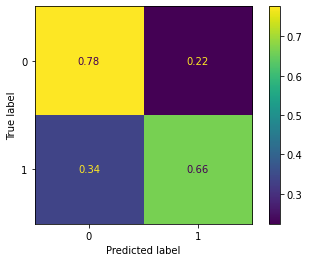

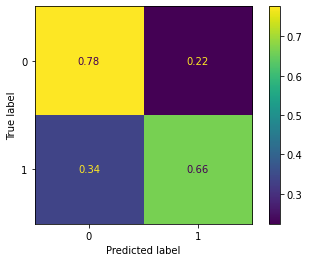

In [119]:
# Logistic regression
logist_regression = LogisticRegression(random_state = seed, solver='liblinear')

model_performance(df, logist_regression, 'Logistic Regression')

KNN


/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.92      0.80      0.85       577
           1       0.31      0.57      0.40        95

    accuracy                           0.76       672
   macro avg       0.62      0.68      0.63       672
weighted avg       0.83      0.76      0.79       672

Model ROI and Success Rate Performance
   number_of_customers   roi  success_rate
0                  672 -0.06          0.26


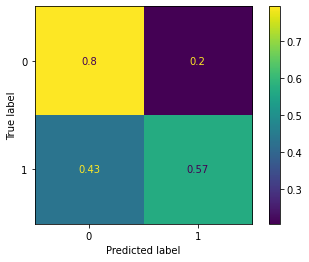

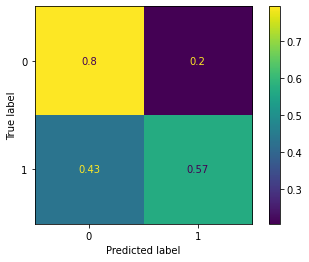

In [120]:
#KNN
KNN = KNeighborsClassifier(n_neighbors=3)

model_performance(df, KNN, 'KNN')

Decision Tree
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       577
           1       0.38      0.48      0.42        95

    accuracy                           0.81       672
   macro avg       0.64      0.68      0.66       672
weighted avg       0.84      0.81      0.82       672

Model ROI and Success Rate Performance
   number_of_customers   roi  success_rate
0                  672 -0.33          0.18


/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


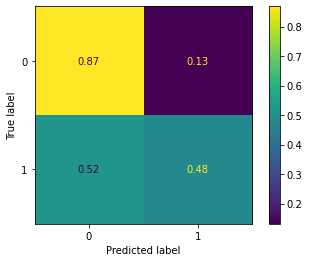

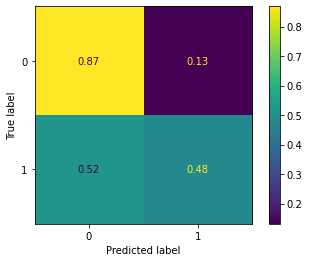

In [121]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=seed)

model_performance(df, decision_tree, 'Decision Tree')

Random Forest


/tmp/ipykernel_284790/1831919916.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


              precision    recall  f1-score   support

           0       0.91      0.94      0.93       577
           1       0.56      0.42      0.48        95

    accuracy                           0.87       672
   macro avg       0.73      0.68      0.70       672
weighted avg       0.86      0.87      0.86       672

Model ROI and Success Rate Performance
   number_of_customers   roi  success_rate
0                  672 -0.61          0.11


/home/guilherme.gomes/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


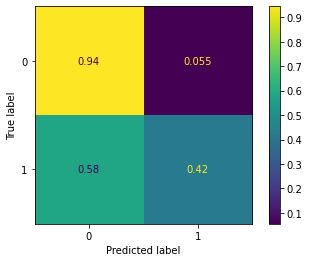

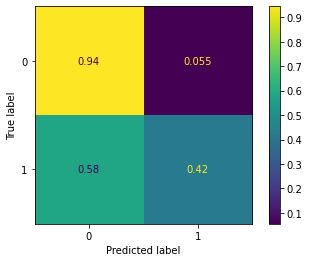

In [122]:
# Random Forest
random_forest = RandomForestClassifier(random_state=seed)

model_performance(df, random_forest, 'Random Forest')